
# Classificador: Naive Bayes

    O classificador Naïve Bayes que é baseado em modelo probabilístico, ou seja, a partir de uma tabela probabilística realiza-se uma classificação probabilística de observações, caracterizando-as em classes pré-definidas. 
    Este é um dos algoritmos de aprendizado supervisionado mais simples. Tem como premissa a suposição de independência entre as variáveis do problema. Isto é, o classificador Naïve Bayes assume que o efeito de uma determinada variável é independente de outras variáveis. Mesmo que essas características dependam umas das outras, todas contribuem independentemente para a probabilidade e, é por isso que ele é conhecido como “naïve” (ingênuo).
    
 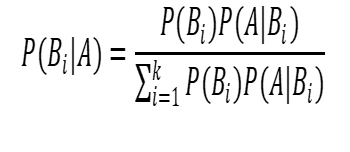

    Usando este teorema, o algoritmo de classificação Naïve Bayes calcula a probabilidade de cada classe para uma 
    dada observação do conjunto de dados de análise como:

    (C = ci |X1 = x1,… ,Xp = xp) =(P(C = ci )P(X1 = x1,… ,Xp = xp|C = ci) )/(P(X1=x1,…Xp=xp))

    Em que ci (i=1,2) é a classe e x1, ..., xp são os valores observados dos preditores (X1, ..., Xp) para uma dada
    observação do conjunto de dados analisado. 
    
    Depois de calcular a probabilidade a posteriori para várias classes diferentes, pode-se selecionar a classe com a 
    maior probabilidade.
    
    
    O algoritmo Naïve Bayes classifica a observação na classe que tem a maior probabilidade.
    MAP(y_i )=max⁡〖 ( ( P(y_i )  Π P(x^j   /  y_i  )〗) ; para cada classe
    
    Este método é denominado estimativa por MAP (do inglês, Maximun A Posteriori).


### Nossa tarefa é analisar o conjunto de dados e prever se a renda de um adulto excederá 50K/ano ou não.



### Classificador: Naive Bayes

    Analisaremos uma base de dados de salários disponível no UCI Machine Learning.

    Source: [UCI](https://archive.ics.uci.edu/ml/datasets/Adult) - 1996-05-01 . 


    A base de dados com 15 colunas e 48.842 linhas (Adult Salary Dataset).



Listing of attributes:

    income: >50K, <=50K.
    age: continuous.
    workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
    fnlwgt: continuous.
    education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
    education-num: continuous.
    marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.
    occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.
    relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.
    race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.
    sex: Female, Male.
    capital-gain: continuous.
    capital-loss: continuous.
    hours-per-week: continuous.
    native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.



In [ ]:
#Import libraries 

import numpy as np # linear algebra
import pandas as pd # data processing

# Libraries for data visualization
import matplotlib.pyplot as plt  
import seaborn as sb 
from pandas.plotting import scatter_matrix

# Import scikit_learn module to split the dataset into train.test sub-datasets
from sklearn.model_selection import train_test_split 
# Import scikit_learn module for k-fold cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
# import the metrics class
from sklearn import metrics
# import stats for accuracy 
import statsmodels.api as sm

In [ ]:
#load the dataset 
salary = pd.read_csv('adult.csv')
salary.head()

In [ ]:
# salary dataset info to find columns and count of the data 
salary.info()

In [ ]:
# Verificando a existencia de valores ausentes(missing)

salary.isnull().sum()


In [ ]:
# Olhando com mais cuidado os valores ausentes!!! 

In [ ]:
salary.head(10).T

     Quando avaliamos as categorias do gráfico acima da variável workclass encontramos a categoria '?'. 
     
     Não encontramos missings na avaliação inicial das variáveis, mas encontramos esse caracter.
     Fazendo uma verificação para as variáveis categoricas.
     Encontramos:

In [ ]:
# code will replace the special character to nan and then drop the columns 
salary['workclass'] = salary['workclass'].replace('?',np.nan)
salary['native-country'] =salary['native-country'].replace('?',np.nan)
salary['occupation'] = salary['occupation'].replace('?',np.nan)


#dropping the NaN rows now 
# salary.dropna(how='any',inplace=True)

In [ ]:
# Verificando a existencia de valores ausentes(missing)

salary.isnull().sum()

    Uma opção pode ser excluirmos as observações com missings.
    Outra opção é não trabalharmos com essas variáveis

    Optamos pela segunda opção

In [ ]:
# informações das variaveis quantitativas

salary.describe().T

In [ ]:
# Uma variável é a variável target: "income" : renda anual 
(salary.income.value_counts() / salary.shape[0]) * 100

    A base disponibilizada para realizar o aprendizado apresenta duas classes: <=50K e >50K  

    A variável target income está no formato categórica, vamos criar uma nova variável transformando a variável 
    target em númerica

    Há várias opções de fazer essa transformação: vamos usar a função "map"

In [ ]:
 
#mapping the data into numerical data using map function
salary['Renda'] = salary['income'].map({'<=50K': 0, '>50K': 1}).astype(int)

    As análises a seguir sempre usaremos a variável target "Income" 

    Vamos analisar as demais variáveis para selecionar quais são as variáveis preditoras plusíveis para utilizar no algoritmo

In [ ]:
# Verificando a variável Age

sb.histplot(data=salary, x="age");

    Quando estamos trabalhando com técnicas supervisionadas precisamos avaliar as variáveis preditoras 
    sempre verificando sua disribuição separadamente entre as classes.

In [ ]:
# Variável age(idade)  com a variável target  (Objetivo)
import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='age', data=salary)
plt.title('Distribuição de age por classe da variável target')
plt.show()

In [ ]:
# Transformando a variável "age" em  categorias

age_cat = []
for dados in salary['age']:
    if dados <= 30:
        age_cat.append('0')
    elif dados <= 45:
        age_cat.append('1')
    else:
        age_cat.append("2")#atribuindo a nova variavel ao conjunto de dados
salary['age_cat'] = age_cat
#resultado
salary.head().T

In [ ]:
# comparison between age_cat and target

Age_cat = pd.crosstab(salary['income'],salary['age_cat'])
Age_cat.div(Age_cat.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

Podemos verificar pelo boxplot acima da  variável idade  por classe que a classe >50K apresenta medidas de posição  superior que as encontradas na classe <50K.

In [ ]:
#plotting a bar graph for age_cat  against Income to see the co-relation between these columns 
salary.groupby('age_cat').Renda.mean().plot(kind='bar');


In [ ]:
# comparison between Sexo and target

Gender = pd.crosstab(salary['income'],salary['gender'])
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

Podemos verificar pelo gráfico acima que na classe >50K encontramos maior penetração de indivíduos do sexo masculino, em comparação a classe <=50K.

Nem todo algoritmo podemos trabalhar com variáveis preditoras categóricas, 
assim vamos fazer transformações de variáveis: deixando variáveis categóricas em numéricas.

In [ ]:
# Transformando a variável categórica em tipo Dummy

#gender
salary['Male'] = salary['gender'].map({'Male': 1, 'Female': 0}).astype(int)

In [ ]:
#plotting a bar graph for Sex against Income to see the co-relation between these columns 
salary.groupby('Male').Renda.mean().plot(kind='bar');

In [ ]:
salary.head().T

In [ ]:
# comparison between marital-status and target

MaritalStatus = pd.crosstab(salary['income'],salary['marital-status'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(12, 12));

Comparando as distribuição das categorias de marital-status entre as duas classes, podemos perceber que na classe >50K há um percentual maior da classe Married-civ-spouse

In [ ]:
#marital-status
 
# Transformando a variável Estad civil em casado e Não casado

salary['Married'] = salary['marital-status'].map({'Married-spouse-absent': 0, 'Widowed': 0, 'Married-civ-spouse': 1, 'Separated': 0, 'Divorced': 0,'Never-married': 0, 'Married-AF-spouse':1}).astype(int)


In [ ]:
# comparison between marital-status and target

MaritalStatus = pd.crosstab(salary['income'],salary['Married'])
MaritalStatus.div(MaritalStatus.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
#plotting a bar graph for MaritalStatus  against Income to see the co-relation between these columns 
salary.groupby('Married').Renda.mean().plot(kind='bar');


In [ ]:
# comparison between educational-num  and target

Educational= pd.crosstab(salary['income'],salary['educational-num'])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(8, 8));
 

In [ ]:
#plotting a bar graph for educational-num  against Income to see the co-relation between these columns 
salary.groupby('educational-num').Renda.mean().plot(kind='bar');

Podemos perceber penetração de renda >50K por categoria de educational-num

Vamos criar categorias conforme a força dessa penetração

In [ ]:
# PRE-PROCESSAMENTO
# Vamos utilizar os algoritmos de classificação para prever os resultados, 

educa_cat = []
for dados in salary['educational-num']:
    if dados <= 8:
        educa_cat.append('0')
    elif dados == 9:
        educa_cat.append('1')
    elif dados <= 12:
        educa_cat.append('2')
    else:
        educa_cat.append("3")#atribuindo a nova variavel ao conjunto de dados
salary['educa_cat'] = educa_cat
#resultado
salary.head().T

In [ ]:
# comparison between educational-num  and target

Educational= pd.crosstab(salary['income'],salary['educa_cat'])
Educational.div(Educational.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));
 

In [ ]:
# plotting a bar graph for educa_cat  against Income to see the co-relation between these columns 
salary.groupby('educa_cat').Renda.mean().plot(kind='bar',title='Penetração Renda >50K por escolaridade ');

In [ ]:
# comparison between race  and target

Race= pd.crosstab(salary['income'],salary['race'])
Race.div(Race.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(10, 10));

In [ ]:
#race
salary['race_white'] =salary['race'].map({'Black': 0, 'Asian-Pac-Islander': 0, 'Other': 0, 'White': 1, 'Amer-Indian-Eskimo': 0}).astype(int)


In [ ]:
# comparison between race_white  and target

Race_white= pd.crosstab(salary['income'],salary['race_white'])
Race_white.div(Race_white.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(6, 6));

In [ ]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('race_white').Renda.mean().plot(kind='bar');

In [ ]:
salary.info()

In [ ]:
# Variável hours-per-week  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='hours-per-week', data=salary)
plt.title('Distribuição de hours-per-week por classe da variável target')
plt.show()

In [ ]:
horasweek = []
for dados in salary['hours-per-week']:
    if dados < 40:
        horasweek.append('0')
    elif dados == 40:
        horasweek.append('1')
    else:
        horasweek.append("2")#atribuindo a nova variavel ao conjunto de dados
salary['horasweek'] = horasweek
#resultado
 

In [ ]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('horasweek').Renda.mean().plot(kind='bar');

In [ ]:

# Variável capital-gain  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='capital-gain', data=salary)
plt.title('Distribuição de capital-gain por classe da variável target')
plt.show()

In [ ]:
capitalgain = []
for dados in salary['capital-gain']:
    if dados == 0:
        capitalgain.append('0')
    else:
        capitalgain.append("1")#atribuindo a nova variavel ao conjunto de dados
salary['capitalgain'] = capitalgain

# se teve ou não ganho de capital
(salary.capitalgain.value_counts() / salary.shape[0]) * 100

In [ ]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('capitalgain').Renda.mean().plot(kind='bar');

In [ ]:

# Variável capital-loss  com a variável target  (Objetivo)

import matplotlib.pyplot as plt  
sb.boxplot(x='income', y='capital-loss', data=salary)
plt.title('Distribuição de capital-loss por classe da variável target')
plt.show()

In [ ]:
capitalloss = []
for dados in salary['capital-loss']:
    if dados == 0:
        capitalloss.append('0')
    else:
        capitalloss.append("1")#atribuindo a nova variavel ao conjunto de dados
salary['capitalloss'] = capitalloss
#resultado

# se teve ou não perda de capital
(salary.capitalloss.value_counts() / salary.shape[0]) * 100

In [ ]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('capitalloss').Renda.mean().plot(kind='bar');

In [ ]:
check = salary.groupby(['capitalgain', 'capitalloss']).size().unstack(1)
check.head(20)

In [ ]:
# Criar uma variável gainloss no Data Frame, sendo 0 = não ganhou nem perdeu capaital , 1= ganhou ou perdeu 
salary.loc[((salary.capitalgain =='0') & (salary.capitalloss =='0')),'gainloss']='0'
salary.loc[((salary.capitalgain =='1') & (salary.capitalloss =='0')), 'gainloss']='1'
salary.loc[((salary.capitalgain =='0') & (salary.capitalloss =='1')), 'gainloss']='1'
salary.loc[((salary.capitalgain =='1') & (salary.capitalloss =='1')), 'gainloss']='1'

(salary.gainloss.value_counts() / salary.shape[0]) * 100

In [ ]:
# se teve ou não perda de capital
(salary.gainloss.value_counts() / salary.shape[0]) * 100

In [ ]:
# plotting a bar graph for race against Income to see the co-relation between these columns 
salary.groupby('gainloss').Renda.mean().plot(kind='bar');

In [ ]:
#informaoes das variaveis
salary.info()

## Finalmente temos:

### Variável Target: Income (classe de renda <=50K e >50K) 

### Variáveis Preditoras:  Age( age_cat) Male Married race_white educa_cat  horasweek gainloss

In [ ]:
#dropping based on uniquiness of data from the dataset 
# A função Pandas .drop() é usada para remover colunas ou linhas especificadas.
# axis=1 representa que pretendemos descartar a própria coluna, 
# inplace=True é mencionar que estamos substituindo o dataframe original, ou seja, 
# salary pelo conjunto de dados limpo após descartar as colunas.


salary.drop(['workclass','fnlwgt', 'educational-num','education', 'marital-status', 'hours-per-week', 'occupation','relationship','race','gender',   'capital-gain','capital-loss','capitalgain','capitalloss', 'native-country'], axis=1, inplace=True)

In [ ]:

salary.head().T


Agora que chegamos nas variáveis de analise: Variável target income e variáveis preditoras: 

In [ ]:
salary.info()


In [ ]:
salary.describe()

In [ ]:
# usando o classificador Naive Bayes CategoricalNB com a variável idade categorica
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento
 
X = salary.iloc[:,[3,4,5,6,7,8,9]].values
y = salary.iloc[:,1].values
X.shape, y.shape

In [ ]:
print(X)

In [ ]:
print(y)

In [ ]:
#Split the data into 70% training and 30% testing data
#NOTE: We have to split the dependent variables (x) and the target or independent variable (y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=17)

In [ ]:
# Documentação do Naive Bayes: https://scikit-learn.org/stable/modules/naive_bayes.html
from sklearn.naive_bayes import CategoricalNB

nbCat = CategoricalNB()


In [ ]:
#Train our model with the training data
nbCat.fit(X_train, y_train)


In [ ]:
#print our price predictions on our test data
y_pred = nbCat.predict(X_test)

In [ ]:
#printing the accuracy values 
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score

cm_nbCat = confusion_matrix(y_test, y_pred)


print("Confusion Matrix:"),cm_nbCat

In [ ]:
ac_nbCat = accuracy_score(y_test,y_pred)

print("Accuracy:"), ac_nbCat*100

In [ ]:
    
#sklearn.metrics.precision_recall_fscore_support
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

# Resultado do classification_report:

In [ ]:
#feeding the predict function with our test values in the format 
[['age_cat','Male','Married','educa_cat','race_white','horas_week','gainloss']]
nbCat.predict([[2,1,1,2,1,1,0]])

In [ ]:
# usando o classificador Naive Bayes  GaussianNB com a variável idade quantitativa
# 1º: Separar o conjunto em variavel resposta e variaveis de treinamento

X = salary.iloc[:,[0,4,5,6,7,8,9]].values
y = salary.iloc[:,1].values
X.shape, y.shape

In [ ]:
from sklearn.naive_bayes import GaussianNB
nbGau = GaussianNB()



In [ ]:
# aplicando o algoritmo na  base treino
nbGau.fit(X_train, y_train)


In [ ]:
# Let’s predict the test results
y_pred  =  nbGau.predict(X_test)


In [ ]:
 print("Predicted value –:"), y_pred  

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm_nbGau = confusion_matrix(y_test, y_pred)
ac_nbGau = accuracy_score(y_test,y_pred)

In [ ]:
 print("Confusion Matrix:"), cm_nbGau

In [ ]:
 print("Accuracy:"), ac_nbGau*100

In [ ]:
print(classification_report(y_test, y_pred))

# Resultado do classification_report:

In [ ]:
#feeding the predict function with our test values in the format 
[['age','Male','Married','educa_cat','race_white','horas_week','gainloss']]
nbGau.predict([[45,0,0,1,1,1,0]])